In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import math
%matplotlib inline

In [2]:
def genData(D, k):
    # generate DxD matrix (random normal numbers, mean = 0, std = 1)
    A = np.random.normal(0,1,(D,D))
    # generate v vector (random normal numbers, mean = 0, std = 1)
    v = np.random.normal(0,1,(D,1))
    # generate e_k column
    e_k = np.array([[int(i==k)] for i in range(D)])
    
    return A, v, e_k

In [3]:
def genNoise(D, var):
    epsilon = np.random.normal(0, var, (D,1))

    return epsilon

In [4]:
def gradDescent(alpha, A, v, e_k, var, maxIter=99999, var_alpha = False):
    # store Fv at each iteration
    F = []
    iter = 0
    alpha_t = alpha
   
    while True:
        epsilon = genNoise(len(v), var)
        pred = A @ v
        G = (np.transpose(A) @ (pred - e_k)) + epsilon
        Fv = sum(np.square(pred - e_k))
        F.append(Fv)
        # For variable alpha, alpha_t = alpha_0/t
        # alpha_t = alpha_0/t^2
        # alpha_t = alpha_0/sqrt(t)
        if var_alpha == True:
            alpha_t = alpha/(math.sqrt(iter+1))
        v = v - (alpha_t * G)
        #  print("Iteration {}: Cost={}".format(iter, Fv))
        # break loop if cost is very small
        if iter >1 and (np.isclose(Fv, F[iter-1]) or iter == maxIter):
            break
        iter += 1
    
    return F, iter

#### Q. Let *alpha<sub>t</sub> = alpha<sub>0</sub> / t*. How can you quantify or plot the average long-term convergence of the iterates, as a function of *t*? Plot your results.

In [5]:
# set alpha
alpha_vec = [0.01, 0.05, 0.1, 0.5, 1, 4]
# set dimension
D = 10
# set k value for e_k
k = 1
# set noise variance
var_vec = [0, 0.2, 0.4, 0.6, 0.8, 1]

converge = {}

/var/folders/xc/6k0c9gs524jfw_htdsqp0j000000gn/T/ipykernel_72912/4127920890.py:11: RuntimeWarning: overflow encountered in square
  Fv = sum(np.square(pred - e_k))


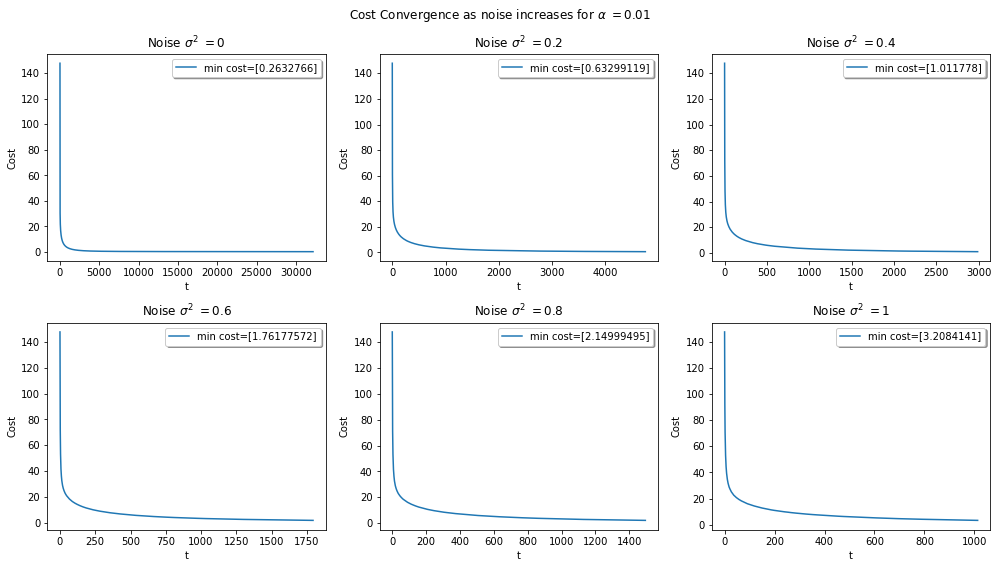

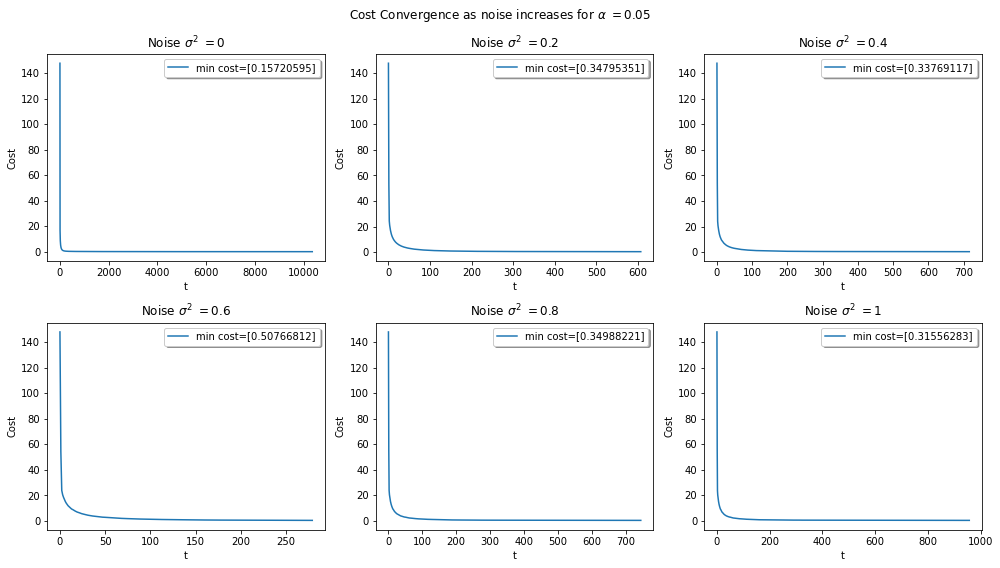

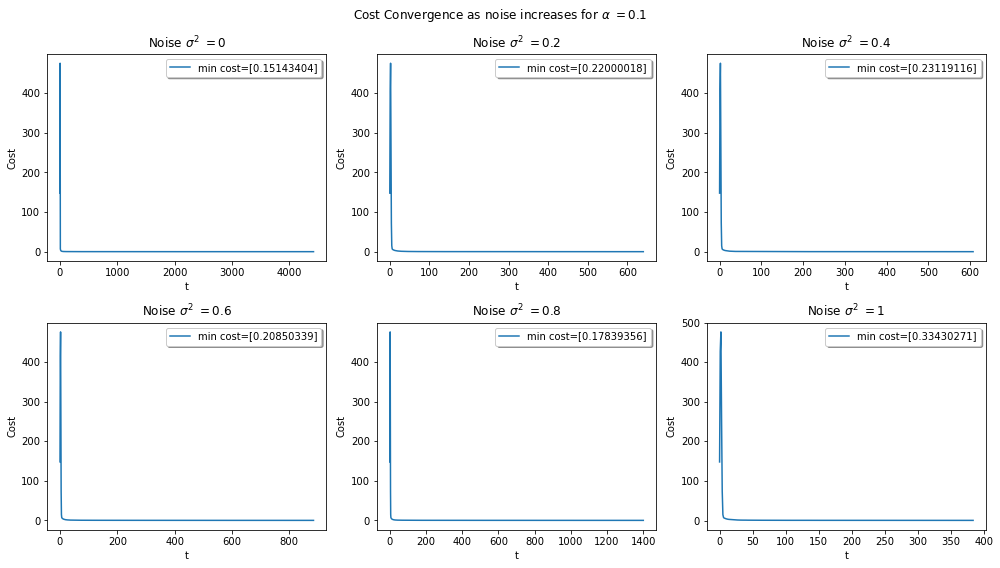

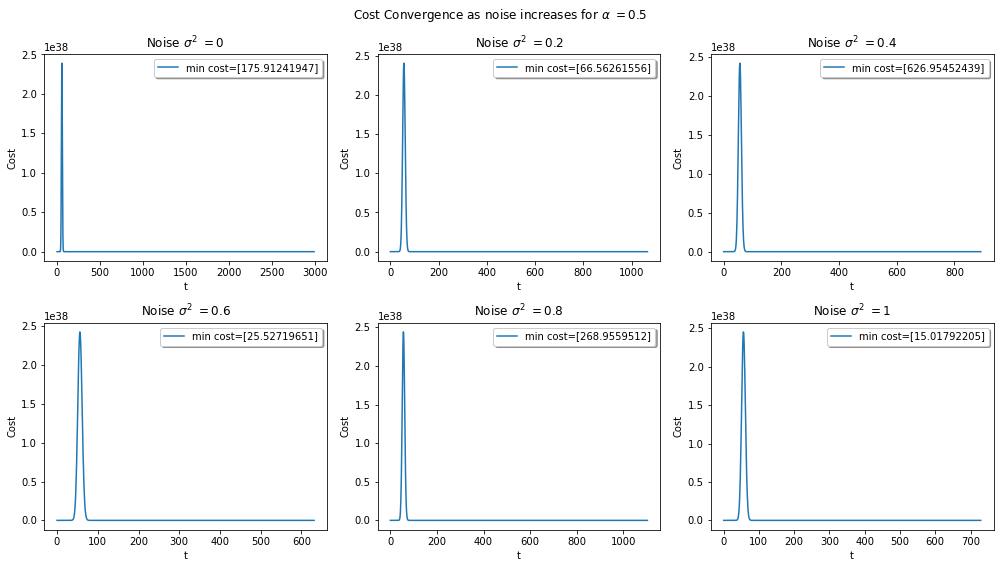

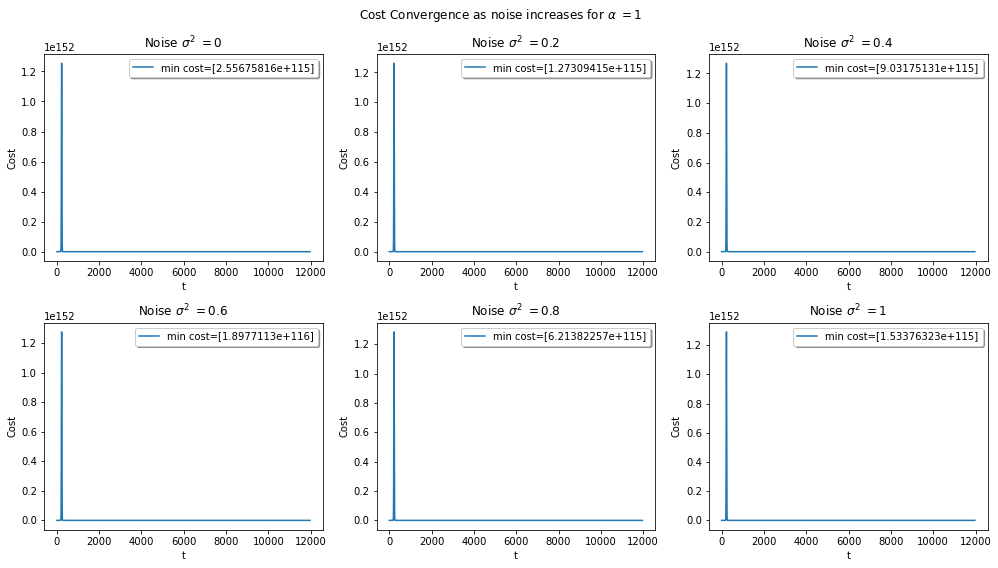

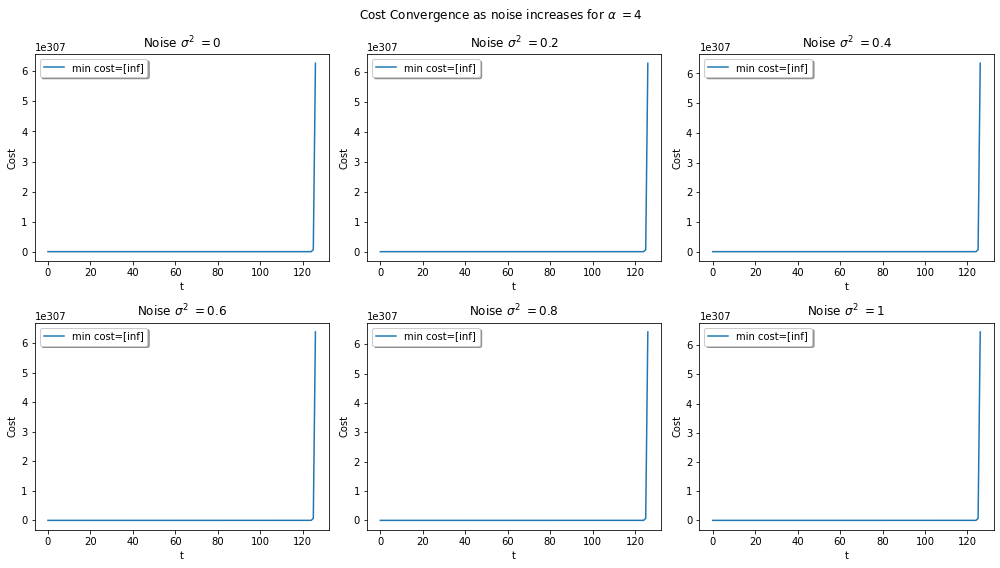

In [6]:
# run noisy gradient descent for different alpha and noise variance combination
for alpha in alpha_vec:
    fig, axs = plt.subplots(2,3)
    fig.set_size_inches(14,8)
    fig.suptitle(r'Cost Convergence as noise increases for $\alpha\ = {}$'.format(alpha))
    i=0
    j=0
    converge[str(alpha)] = []
    cost = 0
    reps = 0
    for var in var_vec:
        reps += 1
        np.random.seed(0)
        [A, v, e_k] = genData(D, k)
        F_grad, iter_grad = gradDescent(alpha, A, v, e_k, var, var_alpha = True)
        cost += F_grad[-1][0]
        converge[str(alpha)].append(cost/reps)
        axs[i,j].plot(F_grad, label='min cost={}'.format(F_grad[-1]))
        axs[i,j].legend(shadow=True, fancybox=True)
        axs[i,j].set_title(r'Noise $\sigma^2\  = {}$'.format(var))
        if (j!=0) and (j%2==0):
            i+=1
            j=0
        else:
            j+=1
    
    for ax in axs.flat:
        ax.set(xlabel='t', ylabel='Cost')
    fig.tight_layout()

##### *From these graphs, we can clearly see that as noise increases for a given alpha, cost also tends to increase. However, we also observe that the cost is minimised without any initial spike in cost when we increase the alpha value till a certain limit [alpha = 0.05], any increase after this point drastically increases the cost initially which again connverges to a minimum as alpha is a function of time and it becomes smaller eventually.*

In [ ]:
# run noisy gradient descent for different alpha and noise variance combination for 20 repetitions and plot their average
i = 0
j = 0
repetitions = 20
fig, axs = plt.subplots(2,3)
fig.set_size_inches(14,8)
fig.suptitle(r'Cost Convergence as noise increases for different $\alpha\ . Number of repitions [={}] for each alpha, noise $\sigma^2\ $'.format(repetitions))
for alpha in alpha_vec:
    for var in var_vec:
        reps = 0
        rep_cost = 0
        rep_F = []
        np.random.seed(0)
        for l in range(repetitions):
            reps += 1
            [A, v, e_k] = genData(D, k)
            F_grad, iter_grad = gradDescent(alpha, A, v, e_k, var, var_alpha = True)
            rep_cost += F_grad[-1][0]
            rep_F.append(rep_cost/reps)
        axs[i,j].plot(rep_F, label=r'Noise $\sigma^2\  = {}$'.format(var))
    axs[i,j].set_title(r'$\alpha\  = {}$'.format(alpha))
    axs[i,j].legend(loc = 'best')

    if (j!=0) and (j%2==0):
        i+=1
        j=0
    else:
        j+=1
    
    for ax in axs.flat:
        ax.set(xlabel='repitions', ylabel='Average Cost Convergence')
    fig.tight_layout()

##### *Above plots show the average of min cost for multiple (20) repetitions at one alpha and one noise variance combination.*

#### Q. What can you say about the expected value of *<u>v</u><sub>t</sub>* as *t* goes to infinity, if *alpha<sub>t</sub> = alpha<sub>0</sub> / t*? what can you say about the expected value of *||A<u>v</u><sub>t</sub> - <u>e</u><sub>k</sub>||<sup>2</sup>*? 

##### *Since the alpha value decreases as a function of t, alpha<sub>t</sub> = alpha<sub>0</sub> / t, after one point it will become very small and stop making significant change to <u>v</u><sub>t</sub>. Hence, we will see that the expected value of <u>v</u><sub>t</sub> converges to a certain minimum and then stops changing. If we do not run this noisy gradient descent for sufficient enough (very large) iterations then the cost (||A<u>v</u><sub>t</sub> - <u>e</u><sub>k</sub>||<sup>2</sup>) will not converge to 0. As <u>v</u><sub>t</sub> stops changing after a certain point, the cost (||A<u>v</u><sub>t</sub> - <u>e</u><sub>k</sub>||<sup>2</sup>) also saturates and stops decreasing.*

#### Q. Is there a threshold where alpha_0 is too small to guarantee good convergence? Does alpha_0 ever fail to lead to convergence if it is too large?

##### > We observe here that as alpha becomes too small the convergence towards optimal solution is almost negligible. Hence, if we take alpha to be very small, say like 0.00001, this will fail to give a good convergence as it stops affecting <u>v</u><sub>t</sub> and thus no significant change in cost is observed.
##### > For the same reasons as above, if the initial alpha value is too large, say alpha > 1, it initially wanders away and diverges from optimal solution. With noise also adding to the adverse factors, it fails to converge back.

#### Q. Where is the sweet spot for alpha_0, and how does it relate to the eigenvalues of A<sup>T</sup>A?

##### The sweet spot seems to be at alpha = 0.05, as it converges quickly to minimum without any initial spike. The alpha here should also be in the range of $$ 0 \lt \alpha \lt 2/\lambda , \text{ where } \lambda \text{ is eigen vector of }A^TA$$